<a href="https://colab.research.google.com/github/NajjaniHanif/CRUD_mhs_dsn/blob/main/Klasifikasi%20Decission%20Tree%20(Studi%20Kasus%20Credit%20Approval).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Template Ujian Tengah Semester 2023
Tanggal: 07 November 2023 - 14.10 - 15.50

Materi: EDA dan Klasifikasi

oleh: Dr. Farrikh Alzami, M.Kom

## Latar Belakang Masalah
Sebuah Bank memerlukan pendistribusian kredit kepada nasabah agar Bank menjadi untung besar. Salah satu produk bank yang ditawarkan adalah kartu kredit. Kartu kredit jika tidak dipegang oleh nasabah yang tepat, berakibat pada macetnya pembayaran tagihan kartu kredit. Oleh sebab itu Bank memerlukan sebuah cara untuk mendeteksi calon nasabah yang akan diberi persetujuan mendapatkan kartu kredit.
Diantara alternatif solusi yang dikembangkan adalah metode Data Science yang menerapkan sebuah framework yang telah dipergunakan secara luas di dunia industri yaitu CRISP-DM framework. Framework ini selanjutnya diuraikan menjadi sebuah 11 urutan langkah2 antara lain: memahami tujuan bisnis, memahami tujuan teknis data science, memahami dan melakukan proses awal data, membuat skenario pemodelan, membuat model yang handal, mengevaluasi pemodelan, dan mereview proyek data science.
Solusi tersebut digunakan untuk mengidentifikasi factor-faktor yang berkontribusi terhadap persetujuan penerbitan kartu kredit.
Hasil prediksi tersebut selanjutnya digunakan oleh bank untuk mencegah macetnya pembayaran tagihan kartu kredit.
Sumber data utama untuk keperluan pengembangan model prediktif ini adalah hasil survey menggunakan data internal bank dengan dataset nasabah yang dikumpulkan selama beberapa tahun terakhir. Dataset tersebut berisi: A1,A2…, A15. Disini A16 merupakan variable dependent nya (label yang dicari). Perlu diperhatikan, nama kolom memang sengaja dihapus agar tidak dapat dibaca oleh orang yang tidak berkepentingan.


## Tujuan Ujian Sertifikasi
pemanfaatan metode Data Science yang utama didalam kasus ini adalah menghasilkan model prediktif yang akurat yang dapat dipergunakan untuk: (1) mengidentifikasi variabel kunci yang mempengaruhi persetujuan penerbitan kartu kredit, dan (2) memprediksi persetujuan penerbitan kartu kredit. Dari hasil pemodelan prediktif dengan Data Science diharapkan dapat memberikan masukan kepada pihak bank untuk memberikan persetujuan penerbitan kartu kredit




<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

## Load Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


**silakan ubah dataset**

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UTS MPB/crx.data', header=None)

In [5]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [6]:
# dataset = pd.read_csv('xxx', header=xxx)

### memasukkan nama fitur kedalam dataset

**silakan dirubah kolom dataset**

In [7]:
dataset.columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","Class"]

In [8]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## BAB 2 – (J.62DMI00.005.1) Menelaah data



### analisis karakteristik data

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


**temuan**: ada beberapa bernilai int64, namun ada yang bernilai Object

In [10]:
categorical_col = []
for column in dataset.columns :
  if dataset[column].dtype == object and len(dataset[column].unique()) <= 50:
    categorical_col.append(column)
    print(f"{column} : {dataset[column].unique()}")
    print("====================================")

A1 : ['b' 'a' '?']
A4 : ['u' 'y' '?' 'l']
A5 : ['g' 'p' '?' 'gg']
A6 : ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
A7 : ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
A9 : ['t' 'f']
A10 : ['t' 'f']
A12 : ['f' 't']
A13 : ['g' 's' 'p']
Class : ['+' '-']


temuan : masih ada data "?"

### cek deskripsi data

In [11]:
dataset.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [12]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [13]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


**temuan**: dari head dan tail, kita lihat semua berbentuk angka, namun ada yang bernilai `?`, ini yang menyebabkan tipe data menjadi `Object`, maka diperlukan proses untuk merubah `?` menjadi bisa digunakan

### cek distribusi Class

**silakan diganti dengan label yang sesuai**

In [14]:
dataset['Class'].value_counts()

-    383
+    307
Name: Class, dtype: int64

temuan = class seimbang-prediksi bisa tinggi

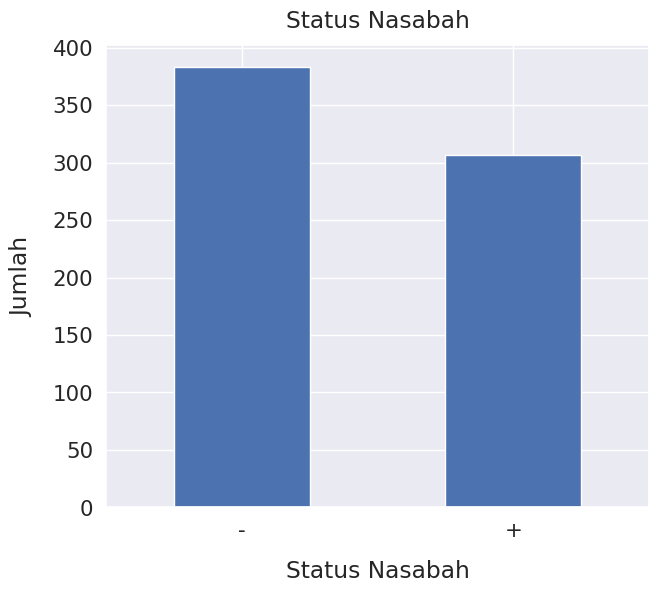

In [15]:
 sns.set(font_scale=1.4)
dataset['Class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Nasabah", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Nasabah", y=1.02);

Temuan : Kelas Seimbang (Balanced)

## Cek Distribusi xxxx

In [16]:
print(dataset['A1'].value_counts())

b    468
a    210
?     12
Name: A1, dtype: int64


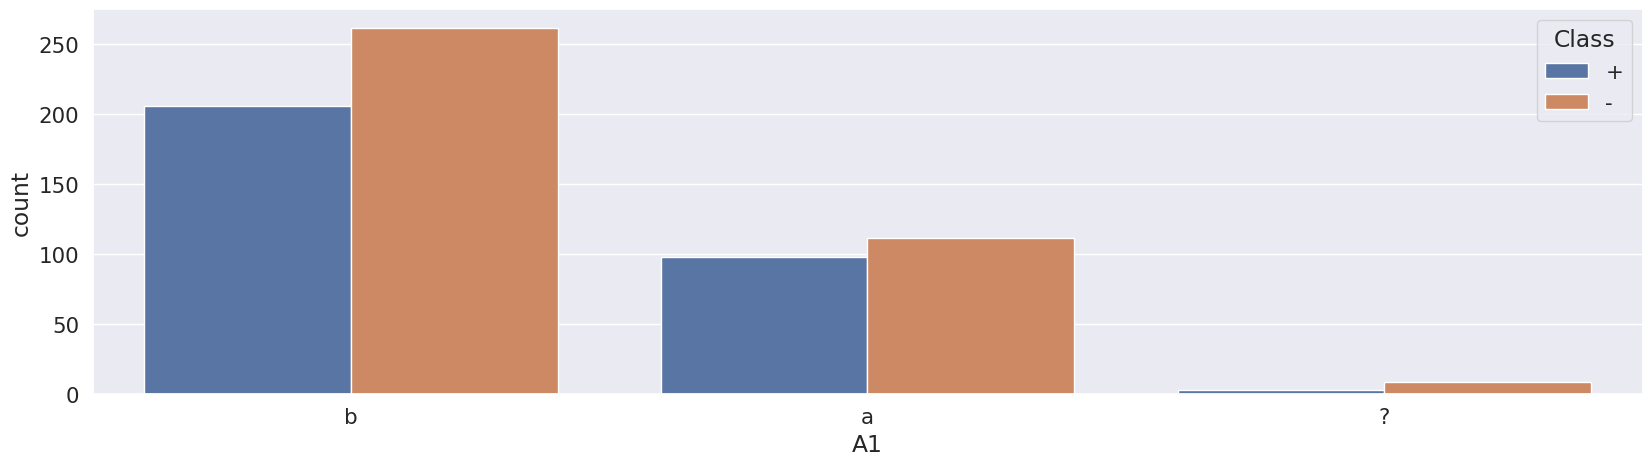

In [17]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A1'],order=dataset['A1'].value_counts().index,hue=dataset['Class'])
plt.show()

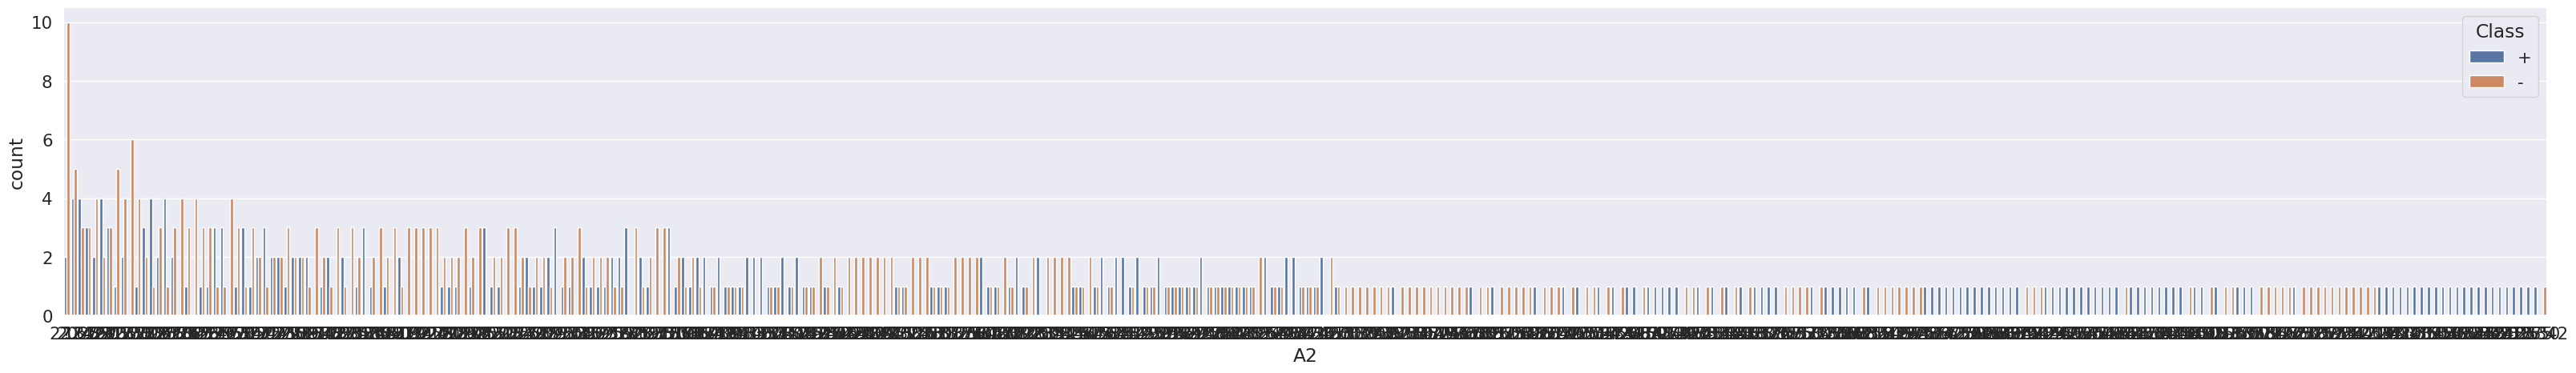

In [18]:
plt.subplots(figsize = (40,5))
sns.countplot(x=dataset['A2'],order=dataset['A2'].value_counts().index,hue=dataset['Class'])
plt.show()

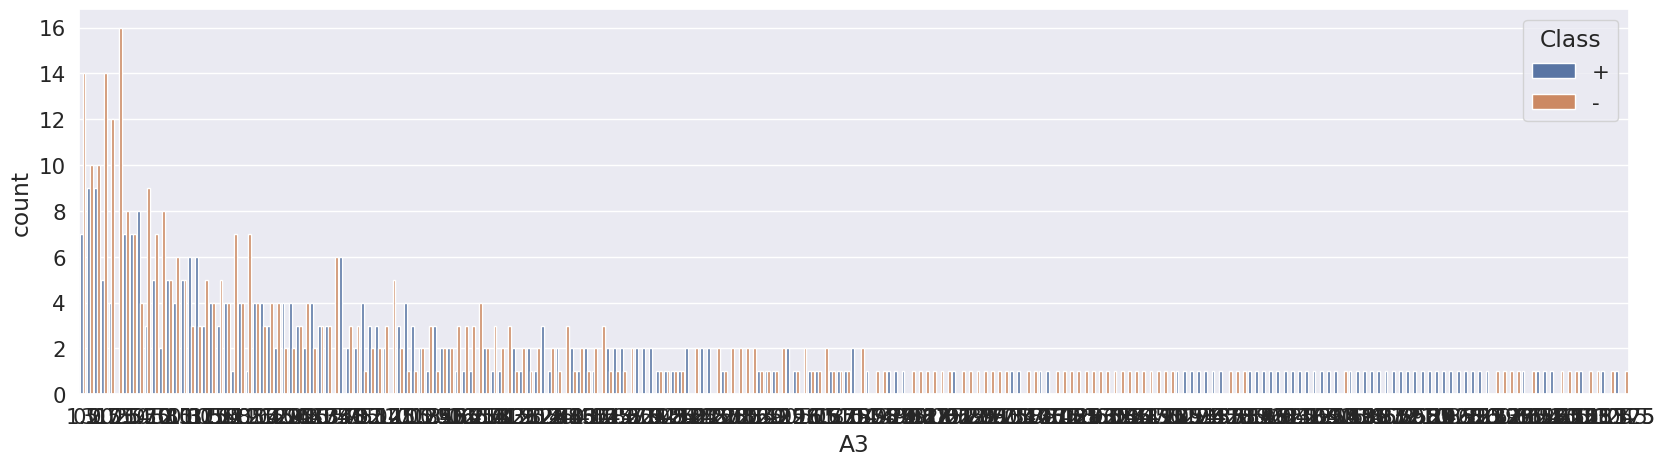

In [19]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A3'],order=dataset['A3'].value_counts().index,hue=dataset['Class'])
plt.show()

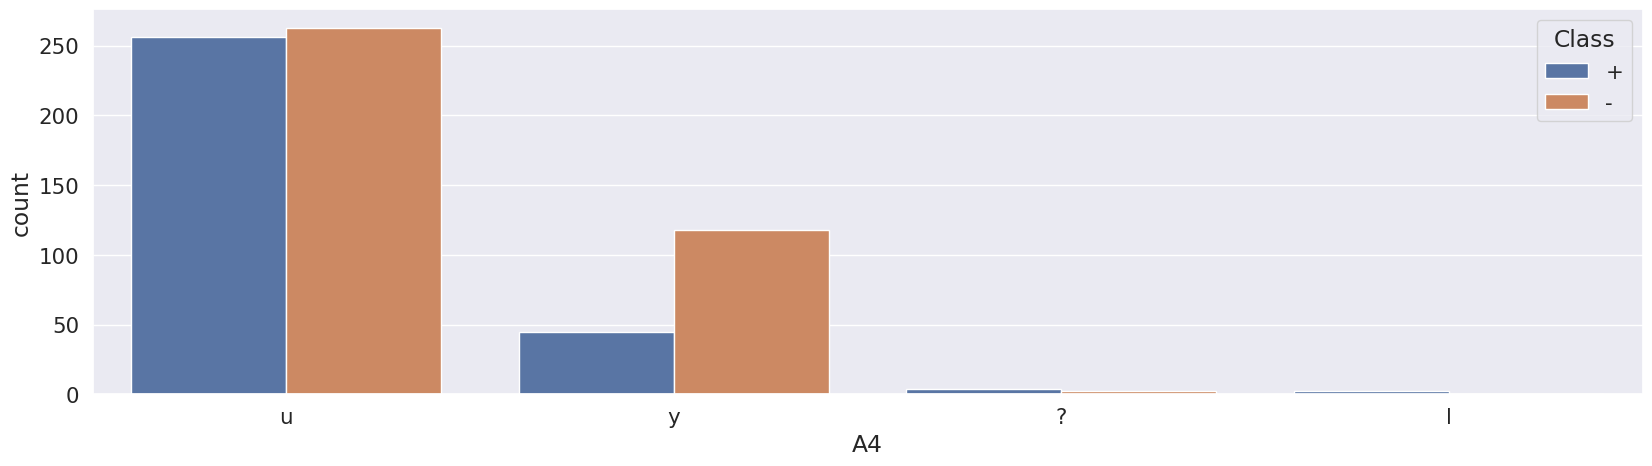

In [20]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A4'],order=dataset['A4'].value_counts().index,hue=dataset['Class'])
plt.show()

Temuan :
u lebih banyak yg tidak di acc,
y lebih banyak yg tidak di acc

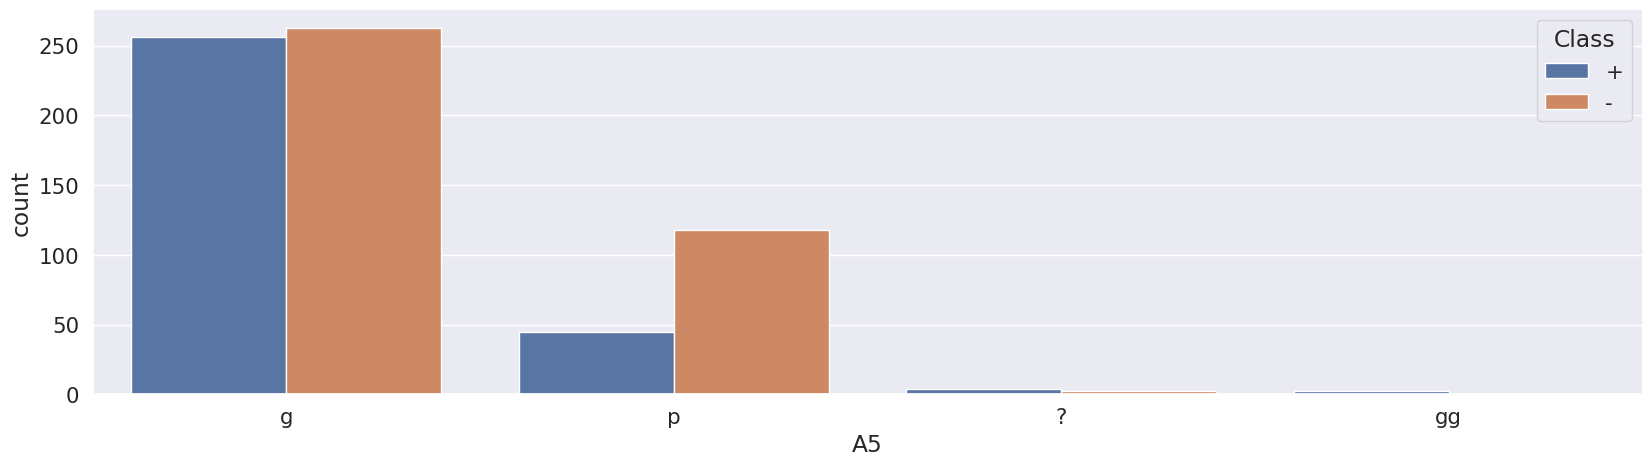

In [21]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A5'],order=dataset['A5'].value_counts().index,hue=dataset['Class'])
plt.show()

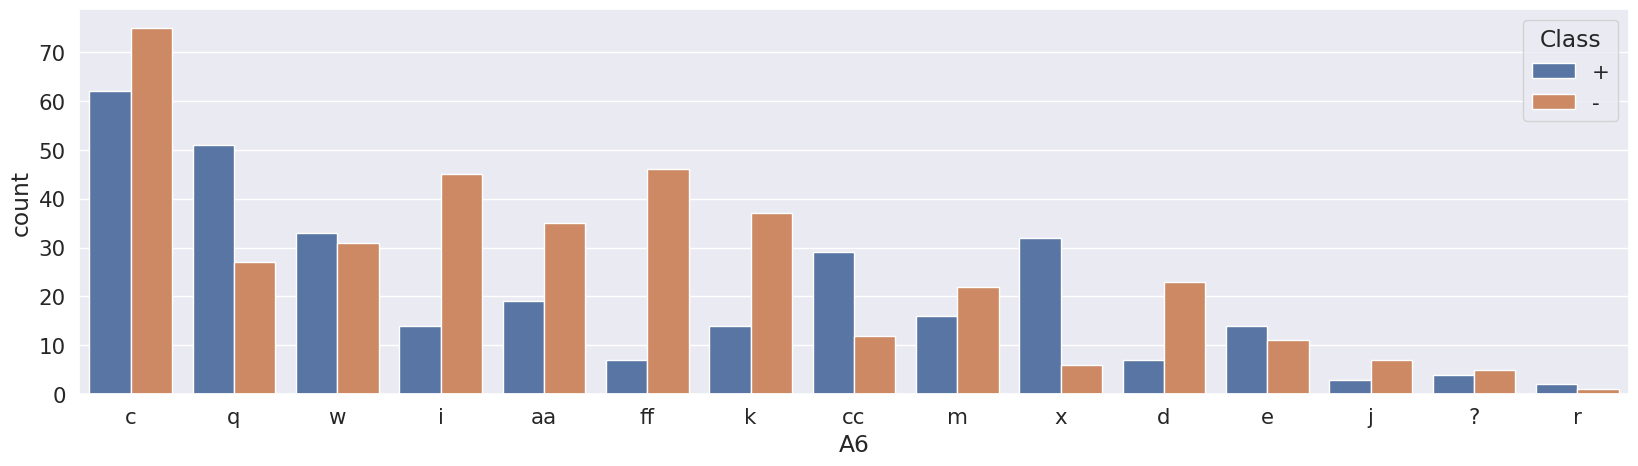

In [22]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A6'],order=dataset['A6'].value_counts().index,hue=dataset['Class'])
plt.show()

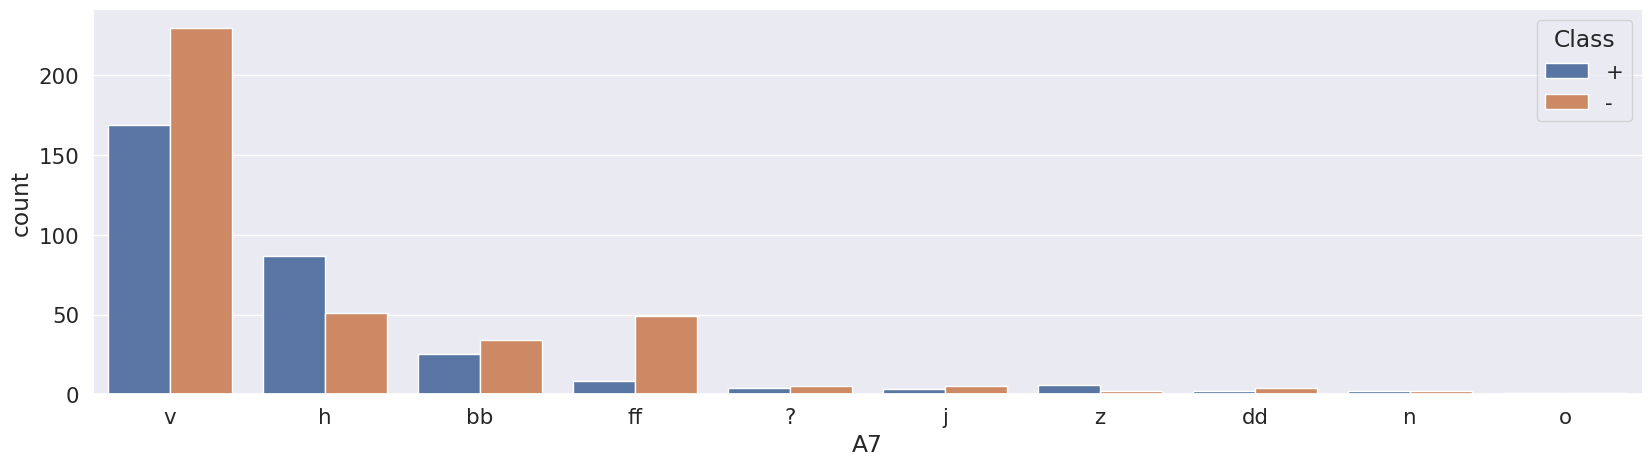

In [23]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A7'],order=dataset['A7'].value_counts().index,hue=dataset['Class'])
plt.show()

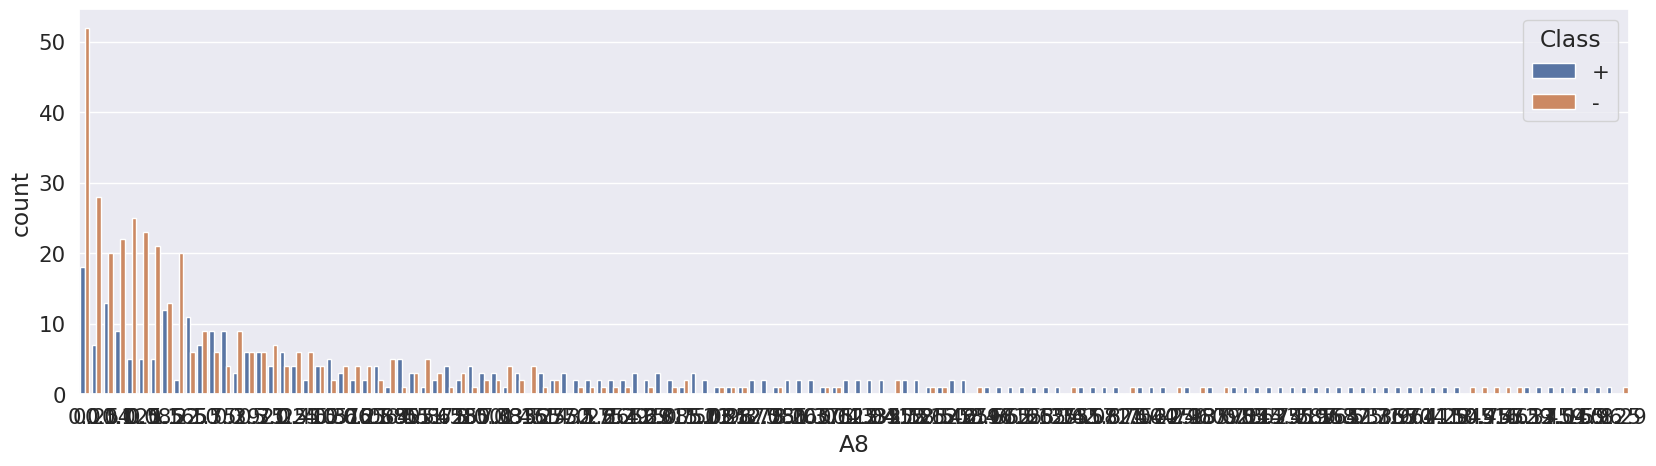

In [24]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A8'],order=dataset['A8'].value_counts().index,hue=dataset['Class'])
plt.show()

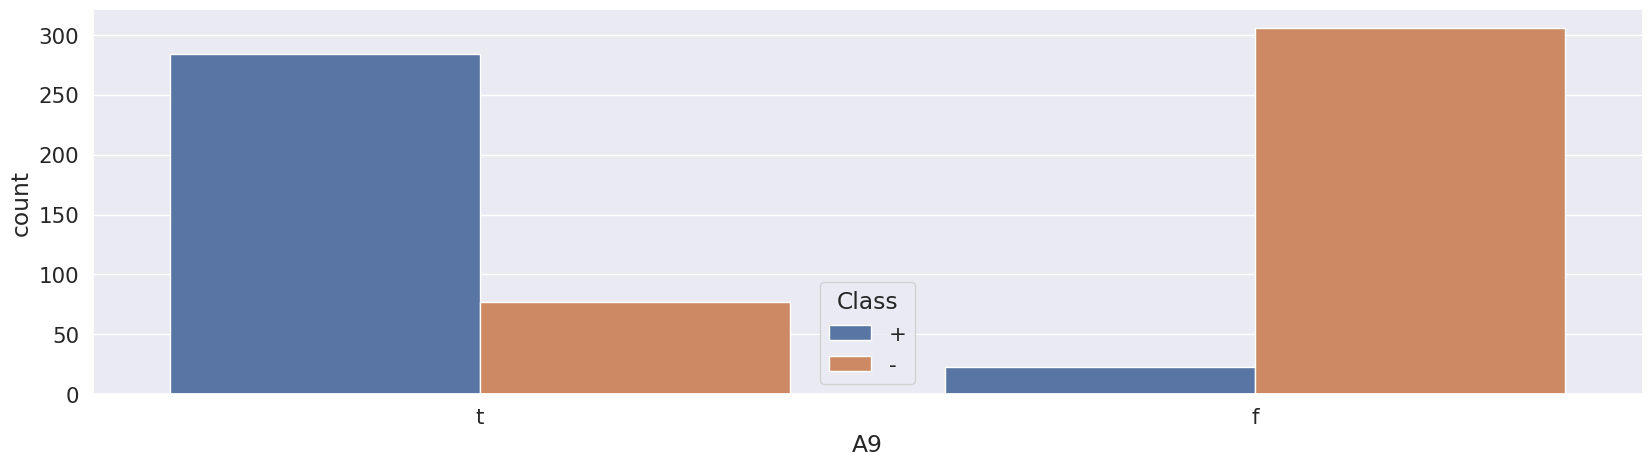

In [25]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A9'],order=dataset['A9'].value_counts().index,hue=dataset['Class'])
plt.show()

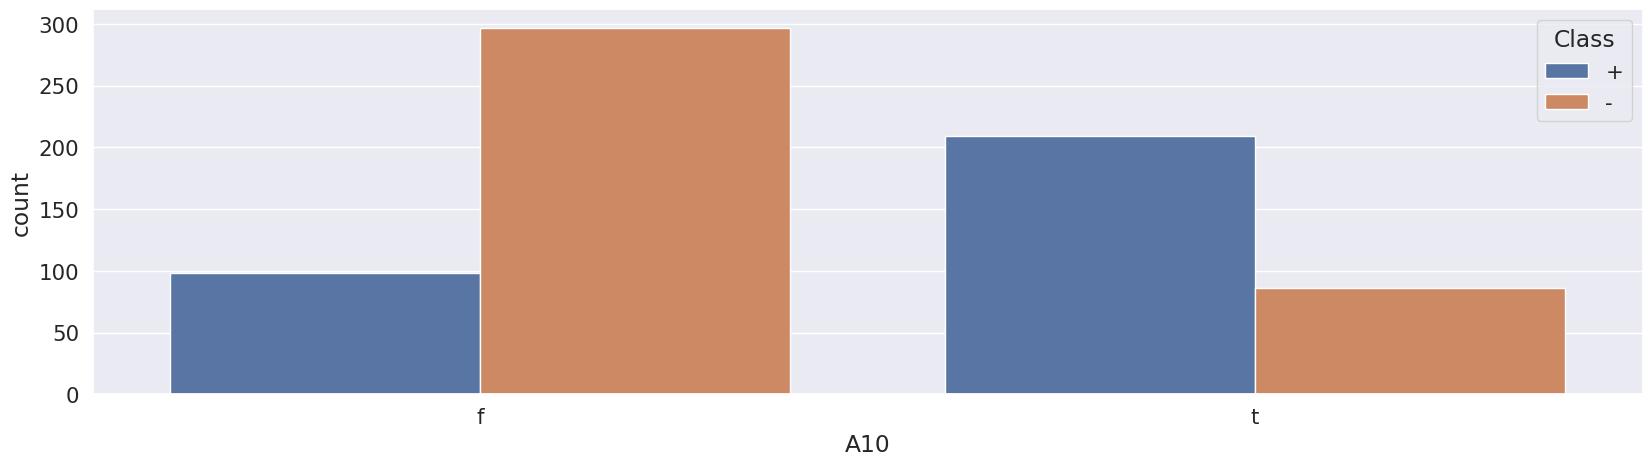

In [26]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A10'],order=dataset['A10'].value_counts().index,hue=dataset['Class'])
plt.show()

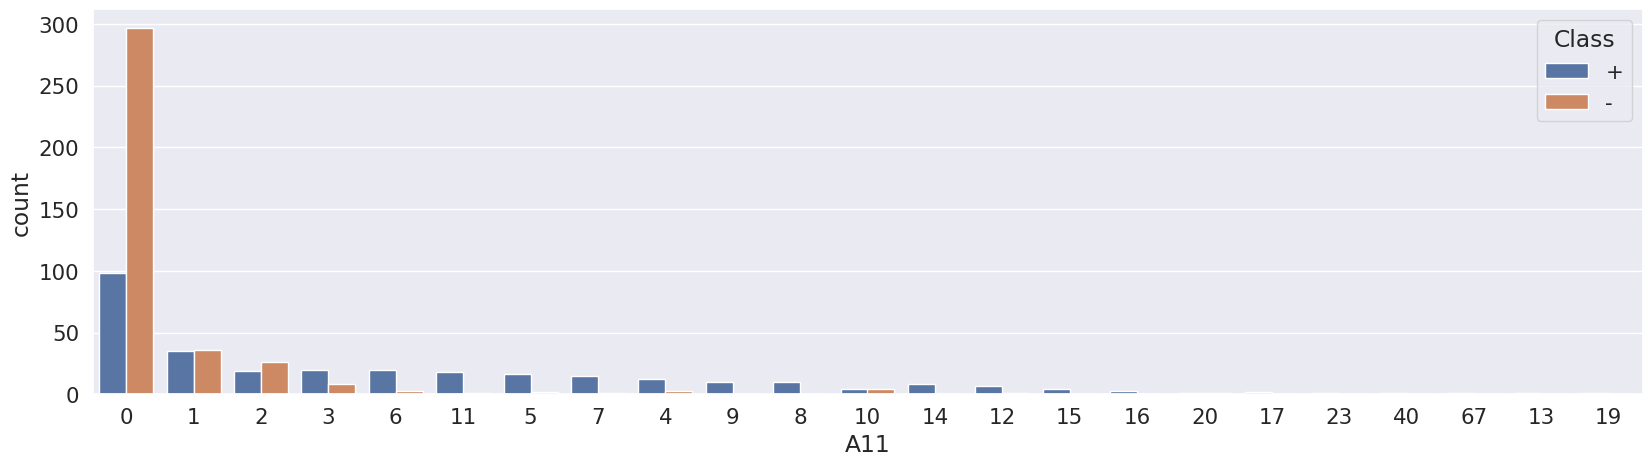

In [27]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A11'],order=dataset['A11'].value_counts().index,hue=dataset['Class'])
plt.show()

temuan:

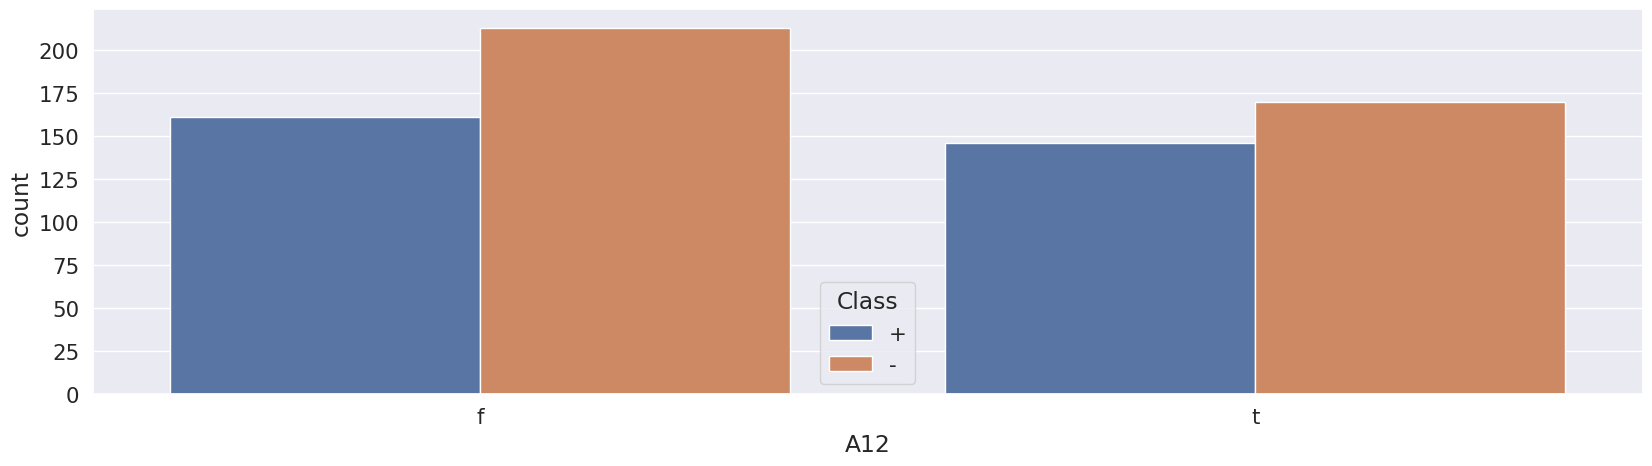

In [28]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A12'],order=dataset['A12'].value_counts().index,hue=dataset['Class'])
plt.show()

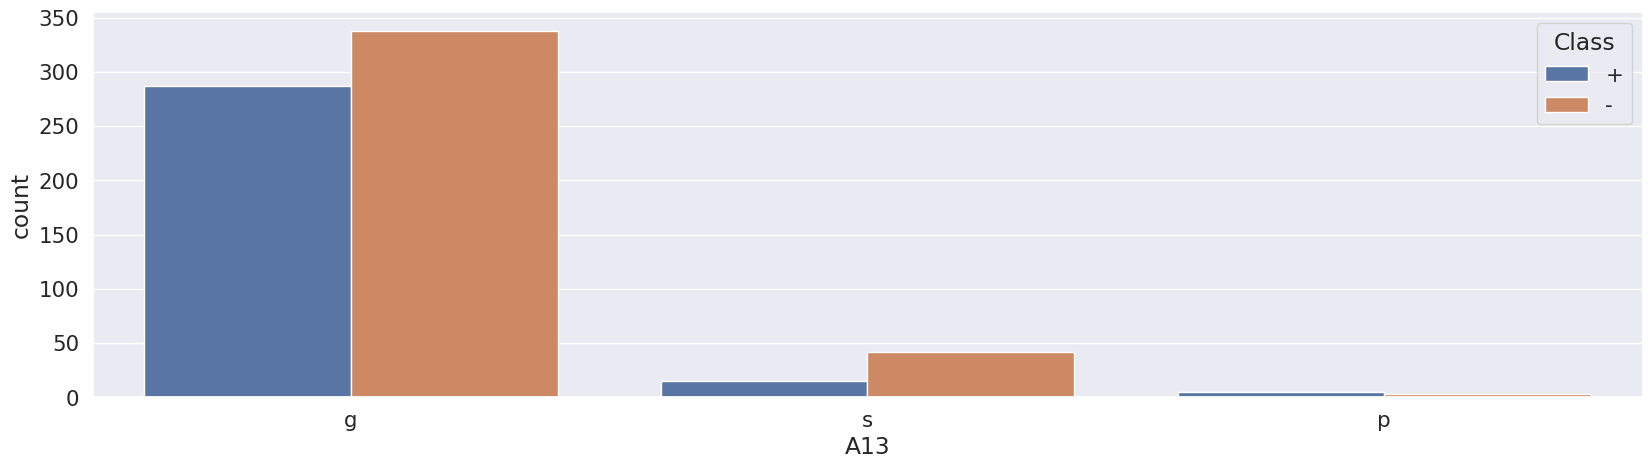

In [29]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A13'],order=dataset['A13'].value_counts().index,hue=dataset['Class'])
plt.show()

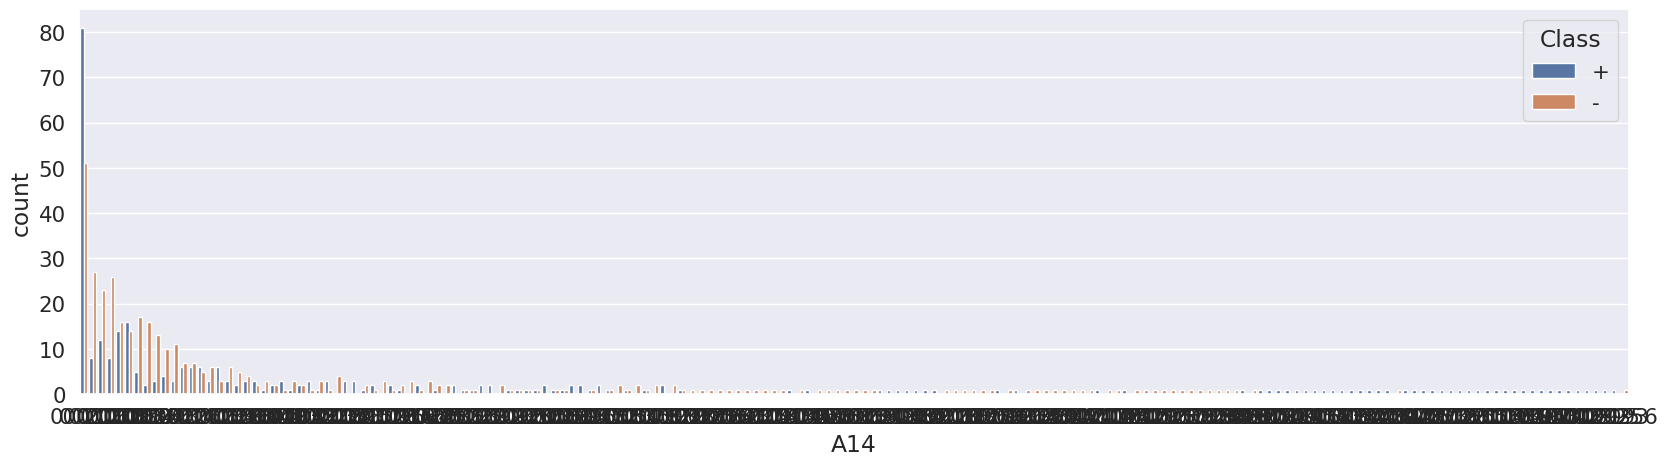

In [30]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A14'],order=dataset['A14'].value_counts().index,hue=dataset['Class'])
plt.show()

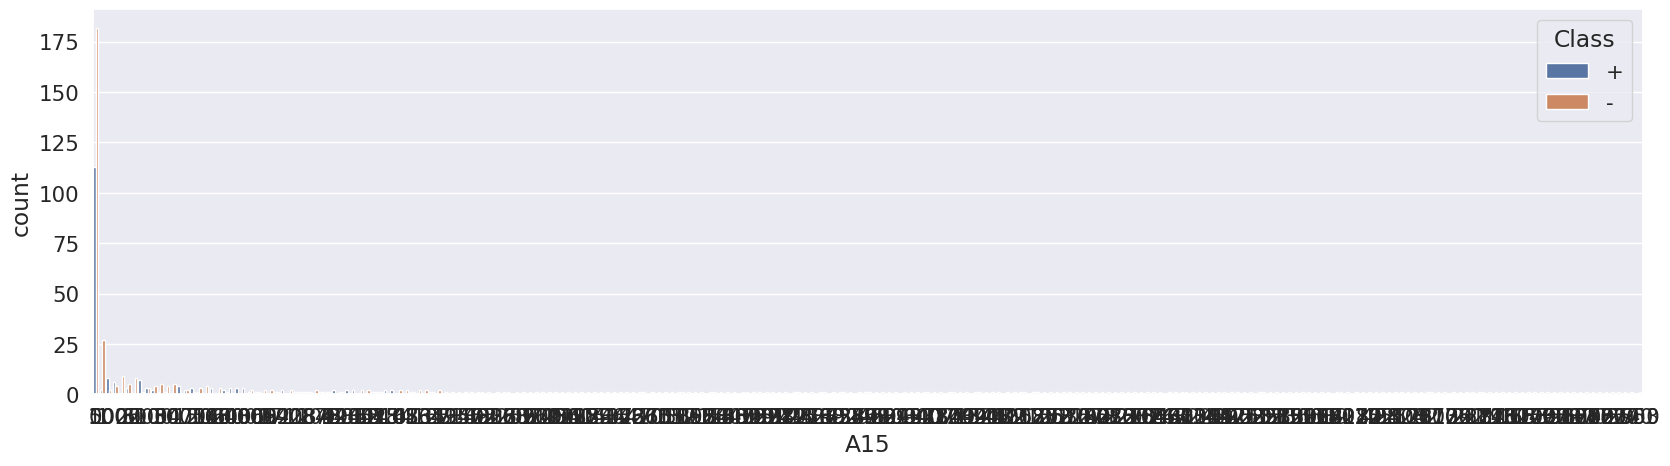

In [31]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A15'],order=dataset['A15'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek korelasi tahap 1

<ipython-input-32-d16bc9c96ddd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


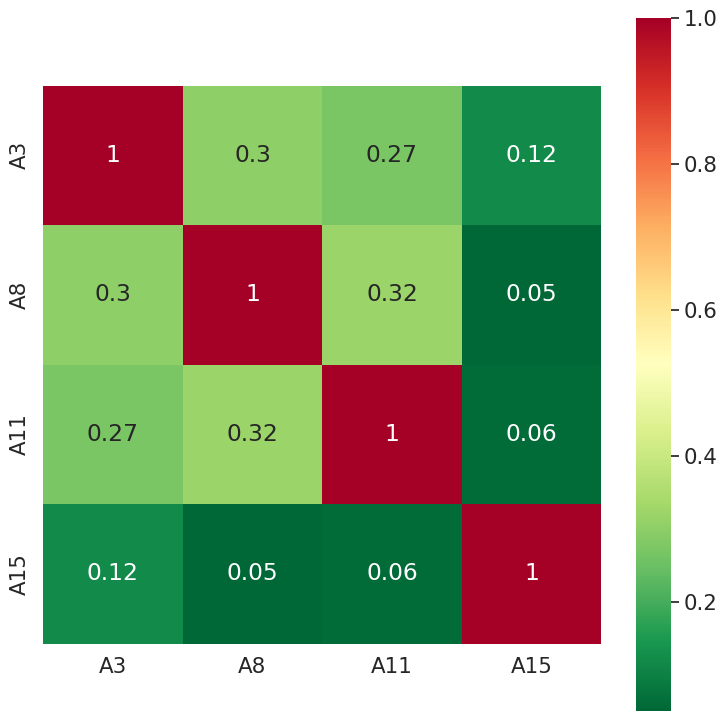

In [32]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

Temuan :


1.   Semua Variabel Tidak Keluar
2.   Harus mengubah data numerik
3.   Masih ada Missing Value



**temuan:**
- ada beberapa fitur yang bernilai `?`, maka dapat kita katakan, bahwa `?` merupakan penanda nilai yang hilang
- korelasi matrix tidak bekerja karena tipe data tidak tepat

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

**temuan**:
- Data pada class seimbang/balance
- harus mengubah variabel object menjadi numerik
- masih ada missing value

## BAB 4 – (J.62DMI00.007.1) menentukan object data
silakan generate table menggunakan https://www.tablesgenerator.com/markdown_tables

- featur yang digunakan A1-A15
- Label yang digunakan/targetnya : Class

**temuan**:

|Nama             | Deskripsi|
|-----------------|---------|
| **Class**       | **Label**   |
| A15             | Atribut |
| A14             | Atribut |


## BAB 5 – (J.62DMI00.008.1) membersihkan data

### Memperbaiki nilai yang hilang

nilai yang hilang, ditulis dalam bentuk ?, maka kita rubah menjadi NaN

**silakan rubah tanda tanya**

In [33]:
dataset.replace("?", np.nan, inplace= True)

### cek bentuk dataset

In [34]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [35]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [36]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")

A1 : ['b' 'a' nan]
A4 : ['u' 'y' nan 'l']
A5 : ['g' 'p' nan 'gg']
A6 : ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
A7 : ['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
A9 : ['t' 'f']
A10 : ['t' 'f']
A12 : ['f' 't']
A13 : ['g' 's' 'p']
Class : ['+' '-']


Data sudah berhasil dideteksi dan berubah menjadi Nan

In [37]:
dataset.isnull().values.any()

True

In [38]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14'], dtype='object')

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


**Mengecek DIstribusi Yang Hilang**

In [40]:
 dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

A1     1.739130
A2     1.739130
A4     0.869565
A5     0.869565
A6     1.304348
A7     1.304348
A14    1.884058
dtype: float64

**temuan**:

<Axes: >

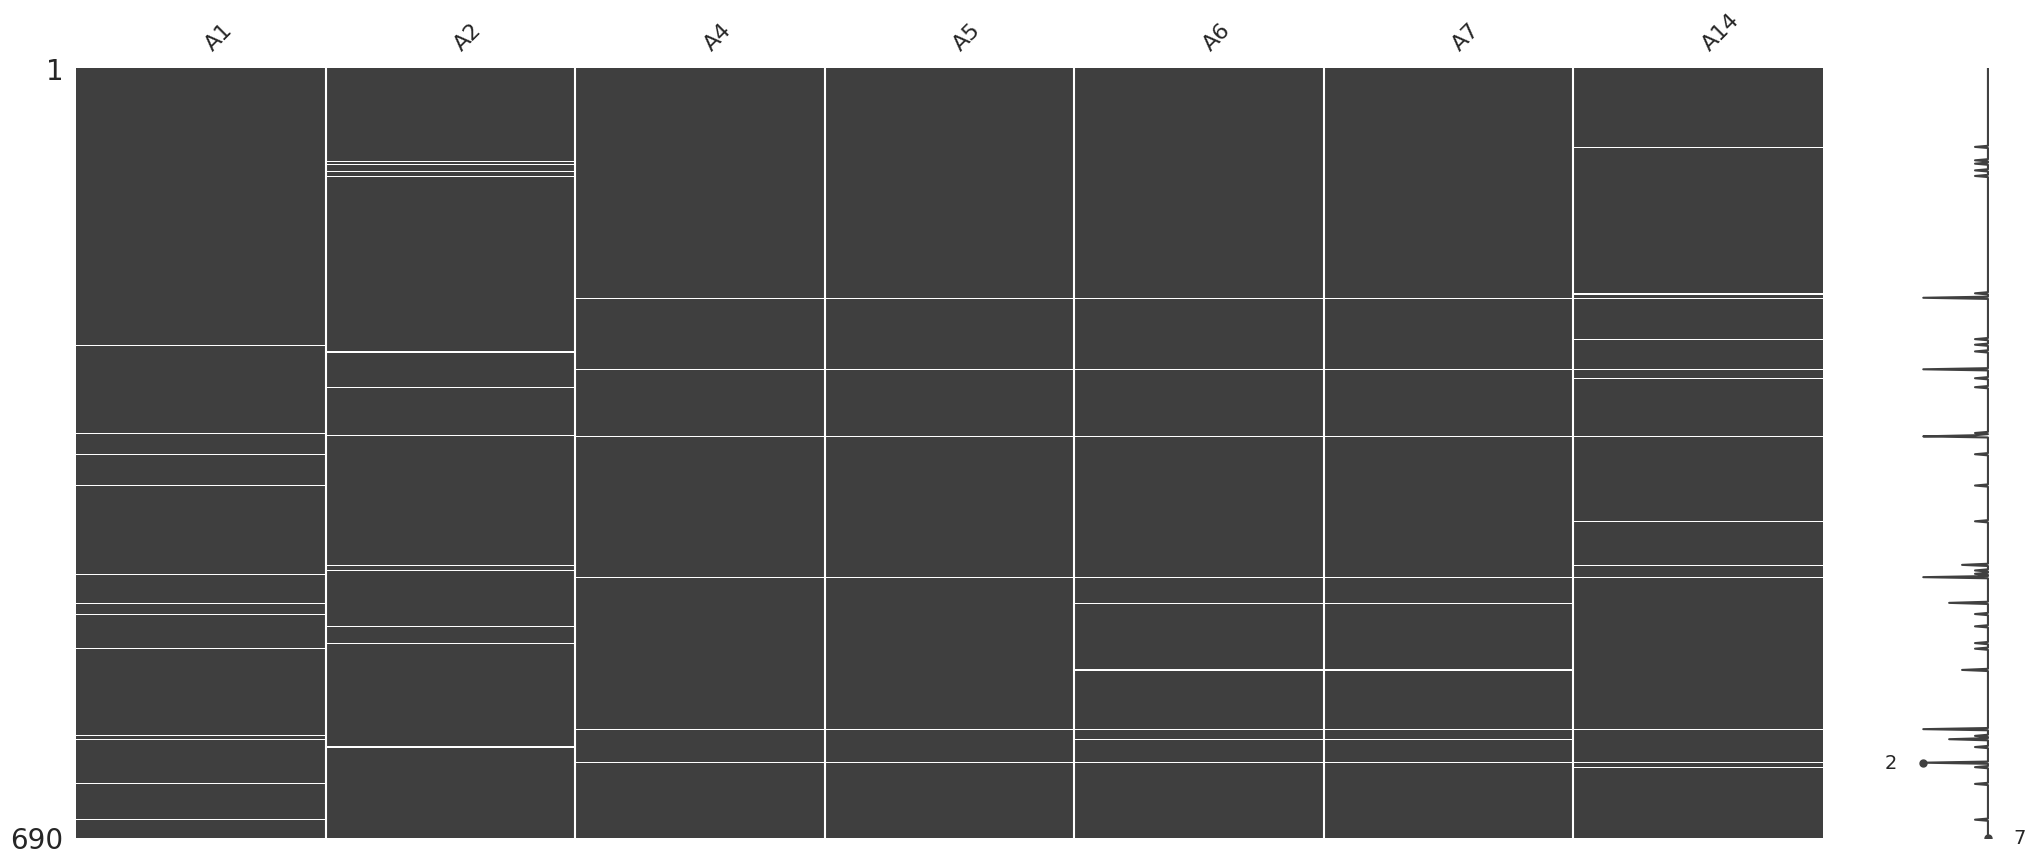

In [41]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

garis putih = data hilang

**Mengubah Kategorik menjadi numerik jika 2 kategori ganti dengan 0,1; jika > 2 kategori ganti dengan 1,2,3 dst**

In [42]:
A1 = {'b':1, 'a':0}
dataset['A1'] = dataset['A1'].map(A1)

A4 = {'u':1, 'y':2, 'l':3}
dataset['A4'] = dataset['A4'].map(A4)

A5 = {'g':1, 'p':2, 'gg':3}
dataset['A5'] = dataset['A5'].map(A5)

A6 = {'w':1, 'q':2, 'm':3, 'r':4, 'cc':5, 'k':6, 'c':7, 'd':8, 'x':9, 'i':10, 'e':11, 'aa':12, 'ff':13, 'j':14}
dataset['A6'] = dataset['A6'].map(A6)

A7 = {'v':1, 'h':2, 'bb':3, 'ff':4, 'j':5, 'z':6, 'o':7, 'dd':8, 'n':9}
dataset['A7'] = dataset['A7'].map(A7)

A9 = {'t':1, 'f':0}
dataset['A9'] = dataset['A9'].map(A9)

A10 = {'t':1, 'f':0}
dataset['A10'] = dataset['A10'].map(A10)

A12 = {'t':1, 'f':0}
dataset['A12'] = dataset['A12'].map(A12)

A13 = {'g':1, 's':2, 'p':3}
dataset['A13'] = dataset['A13'].map(A13)

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    float64
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    float64
 4   A5      684 non-null    float64
 5   A6      681 non-null    float64
 6   A7      681 non-null    float64
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(7), int64(6), object(3)
memory usage: 86.4+ KB


**Menghapus Data Hilang dengan nilai median**

In [44]:
median_value=dataset['A1'].median()
dataset['A1']=dataset['A1'].fillna(median_value)

median_value=dataset['A2'].median()
dataset['A2']=dataset['A2'].fillna(median_value)

median_value=dataset['A4'].median()
dataset['A4']=dataset['A4'].fillna(median_value)

median_value=dataset['A5'].median()
dataset['A5']=dataset['A5'].fillna(median_value)

median_value=dataset['A6'].median()
dataset['A6']=dataset['A6'].fillna(median_value)

median_value=dataset['A7'].median()
dataset['A7']=dataset['A7'].fillna(median_value)

median_value=dataset['A14'].median()
dataset['A14']=dataset['A14'].fillna(median_value)

cek kembali

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    float64
 4   A5      690 non-null    float64
 5   A6      690 non-null    float64
 6   A7      690 non-null    float64
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(7), int64(6), object(3)
memory usage: 86.4+ KB


**temuan**: karena masih ada data yang numerik dianggap objek (A2,A14) maka akan diubah menjadi float & int dengan melakukan BAB 6 Konstruksi

## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data

**silakan pakai sesuai kebutuhan**

In [46]:
dataset['A1'] = dataset['A1'].astype(float).astype(int)
dataset['A4'] = dataset['A4'].astype(float).astype(int)
dataset['A5'] = dataset['A5'].astype(float).astype(int)
dataset['A6'] = dataset['A6'].astype(float).astype(int)
dataset['A7'] = dataset['A7'].astype(float).astype(int)
dataset['A9'] = dataset['A9'].astype(float).astype(int)
dataset['A10'] = dataset['A10'].astype(float).astype(int)
dataset['A12'] = dataset['A12'].astype(float).astype(int)
dataset['A13'] = dataset['A13'].astype(float).astype(int)

In [47]:
dataset['A2'] = dataset['A2'].astype(str).astype(float)
dataset['A14'] = dataset['A14'].astype(str).astype(float)

In [48]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,1,30.83,0.000,1,1,1,1,1.25,1,1,1,0,1,202.0,0,+
1,0,58.67,4.460,1,1,2,2,3.04,1,1,6,0,1,43.0,560,+
2,0,24.50,0.500,1,1,2,2,1.50,1,0,0,0,1,280.0,824,+
3,1,27.83,1.540,1,1,1,1,3.75,1,1,5,1,1,100.0,3,+
4,1,20.17,5.625,1,1,1,1,1.71,1,0,0,0,2,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,11,2,1.25,0,0,0,0,1,260.0,0,-
686,0,22.67,0.750,1,1,7,1,2.00,0,1,2,1,1,200.0,394,-
687,0,25.25,13.500,2,2,13,4,2.00,0,1,1,1,1,200.0,1,-
688,1,17.92,0.205,1,1,12,1,0.04,0,0,0,0,1,280.0,750,-


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(4), int64(11), object(1)
memory usage: 86.4+ KB


In [50]:
dataset.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,1.242029,1.242029,6.960870,1.847826,2.223406,0.523188,0.427536,2.40000,0.457971,1.105797,183.562319,1017.385507
std,0.460464,11.860245,4.978163,0.435342,0.435342,3.802822,1.395110,3.346513,0.499824,0.495080,4.86294,0.498592,0.343458,172.190278,5210.102598
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,3.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,1.000000,80.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,160.000000,5.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,10.000000,2.000000,2.625000,1.000000,1.000000,3.00000,1.000000,1.000000,272.000000,395.500000
max,1.000000,80.250000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100000.000000


### menghapus nilai yang bernilai konstan

In [51]:
dataset=dataset.loc[:,dataset.apply(pd.Series.nunique) !=1]

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(4), int64(11), object(1)
memory usage: 86.4+ KB


karena fitur sama sama ada 15 artinya tidak ada data bernilai konstan

### cek Korelasi

<ipython-input-53-4001db5d4bca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


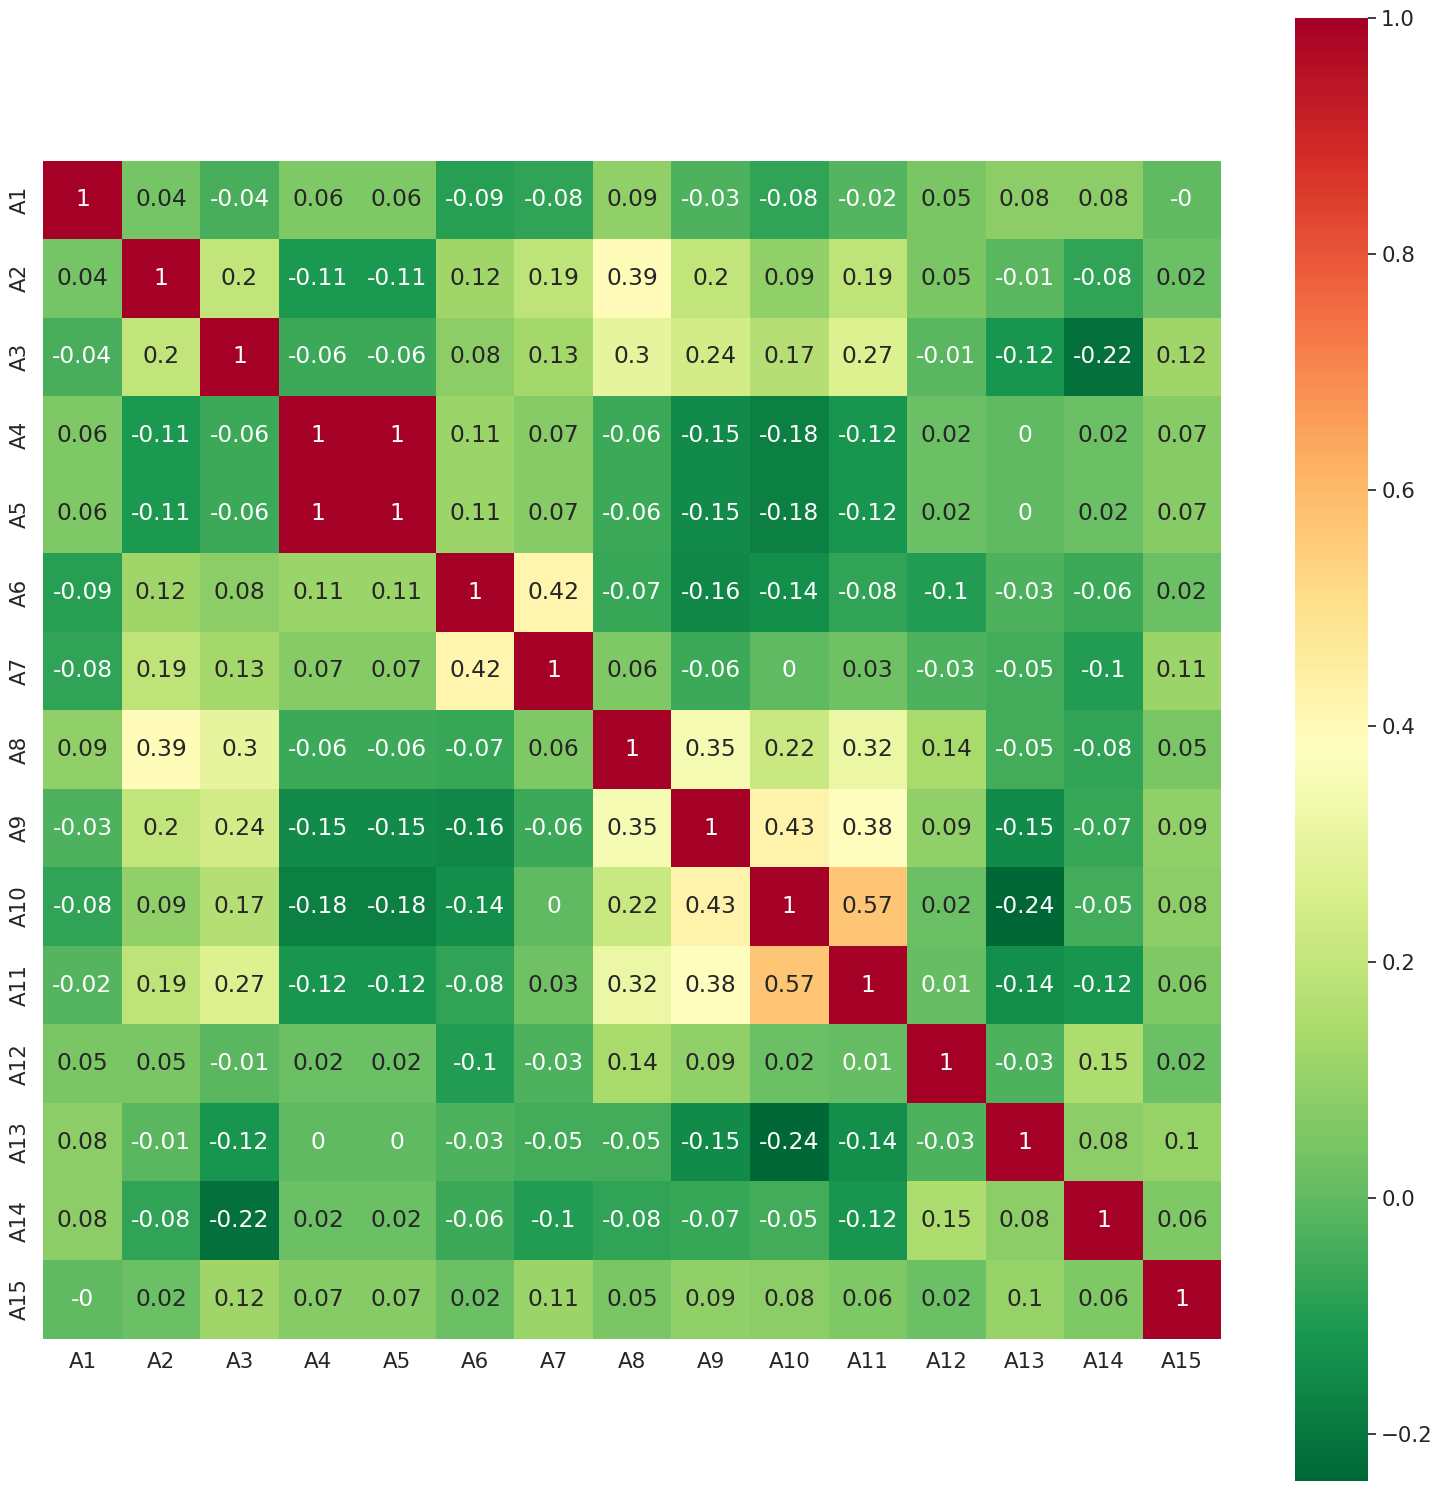

In [53]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

nilai korelasi tinggi, A5 DAN A4 PILIH SALAH SATU FEATURE

In [54]:
dataset.drop(['A4'], axis="columns", inplace=True)

<ipython-input-55-4001db5d4bca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


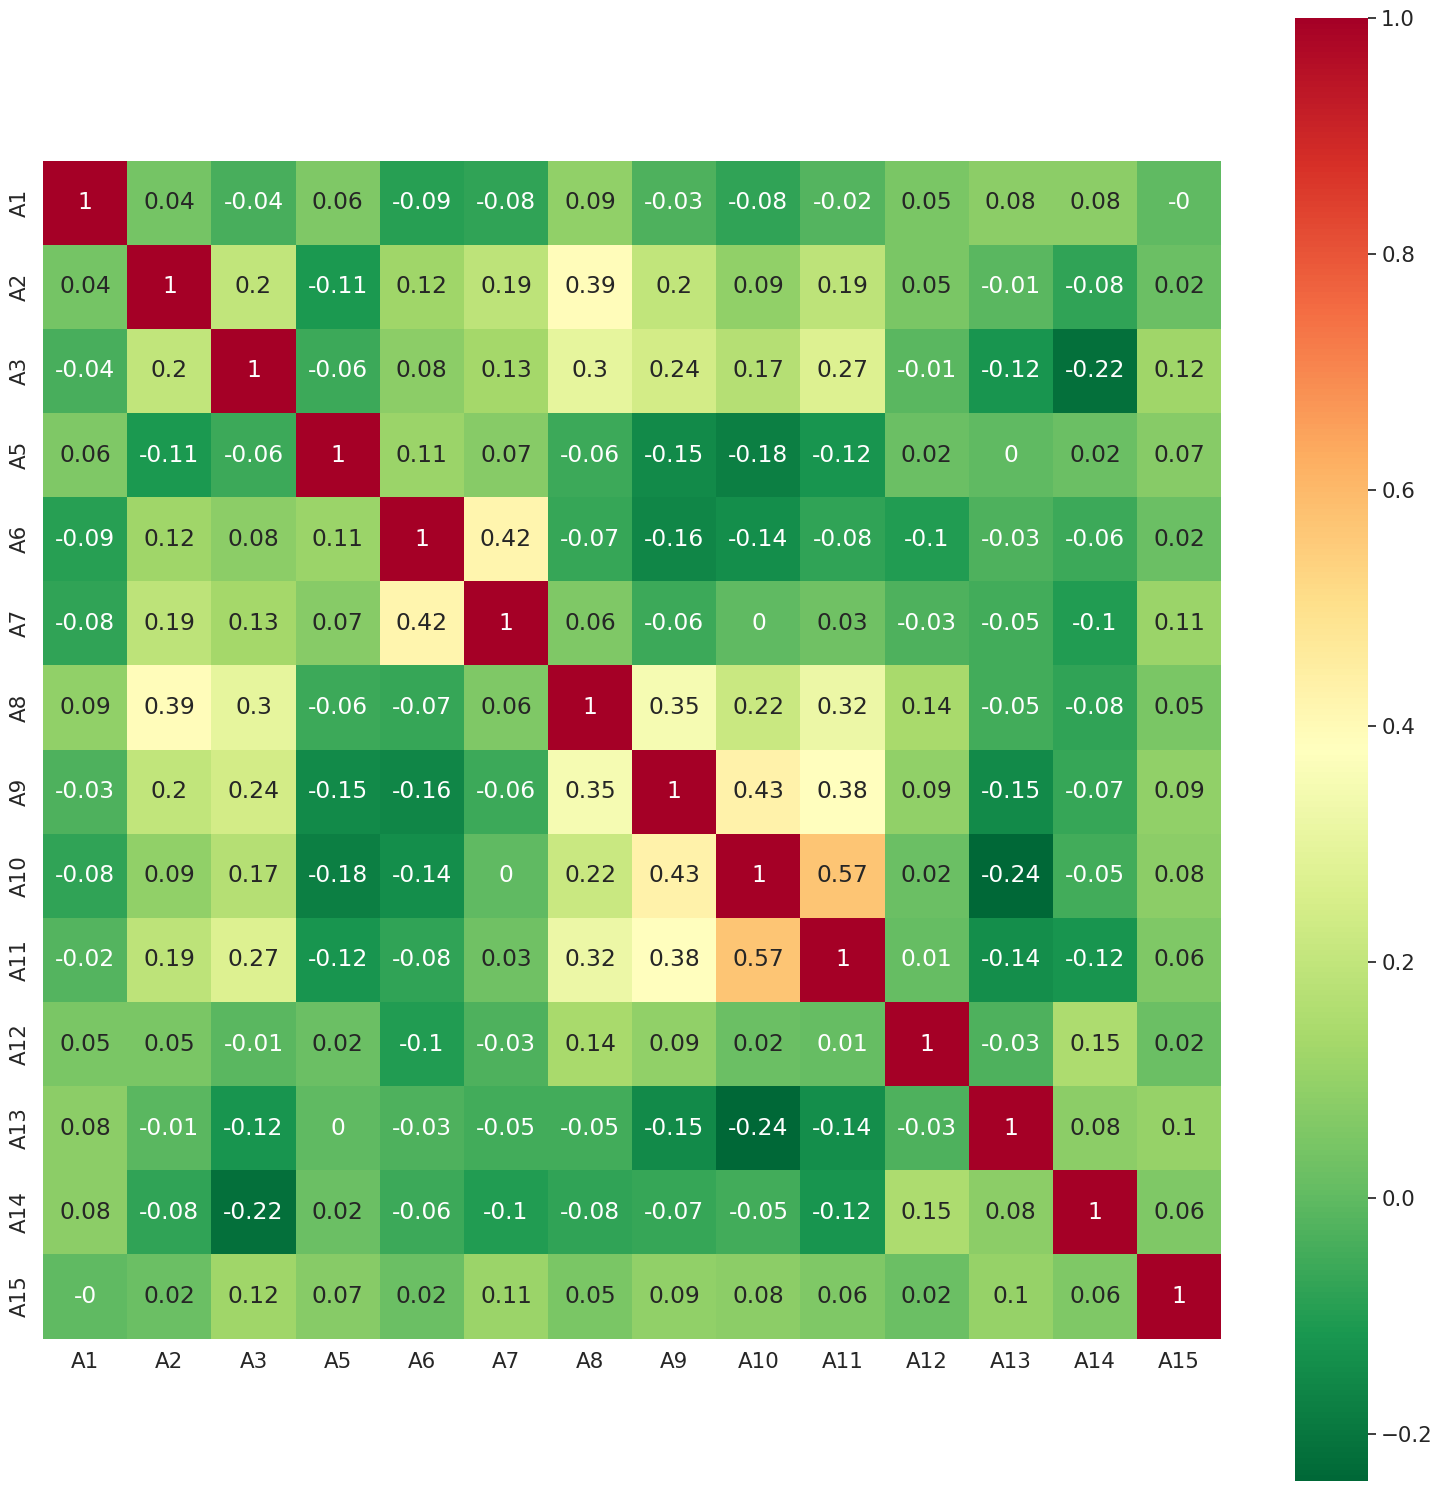

In [55]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

### cek outlier
- bisa dihapus
- sudah pakai median, tidak perlu hapus outlier

**Cek Boxplot**

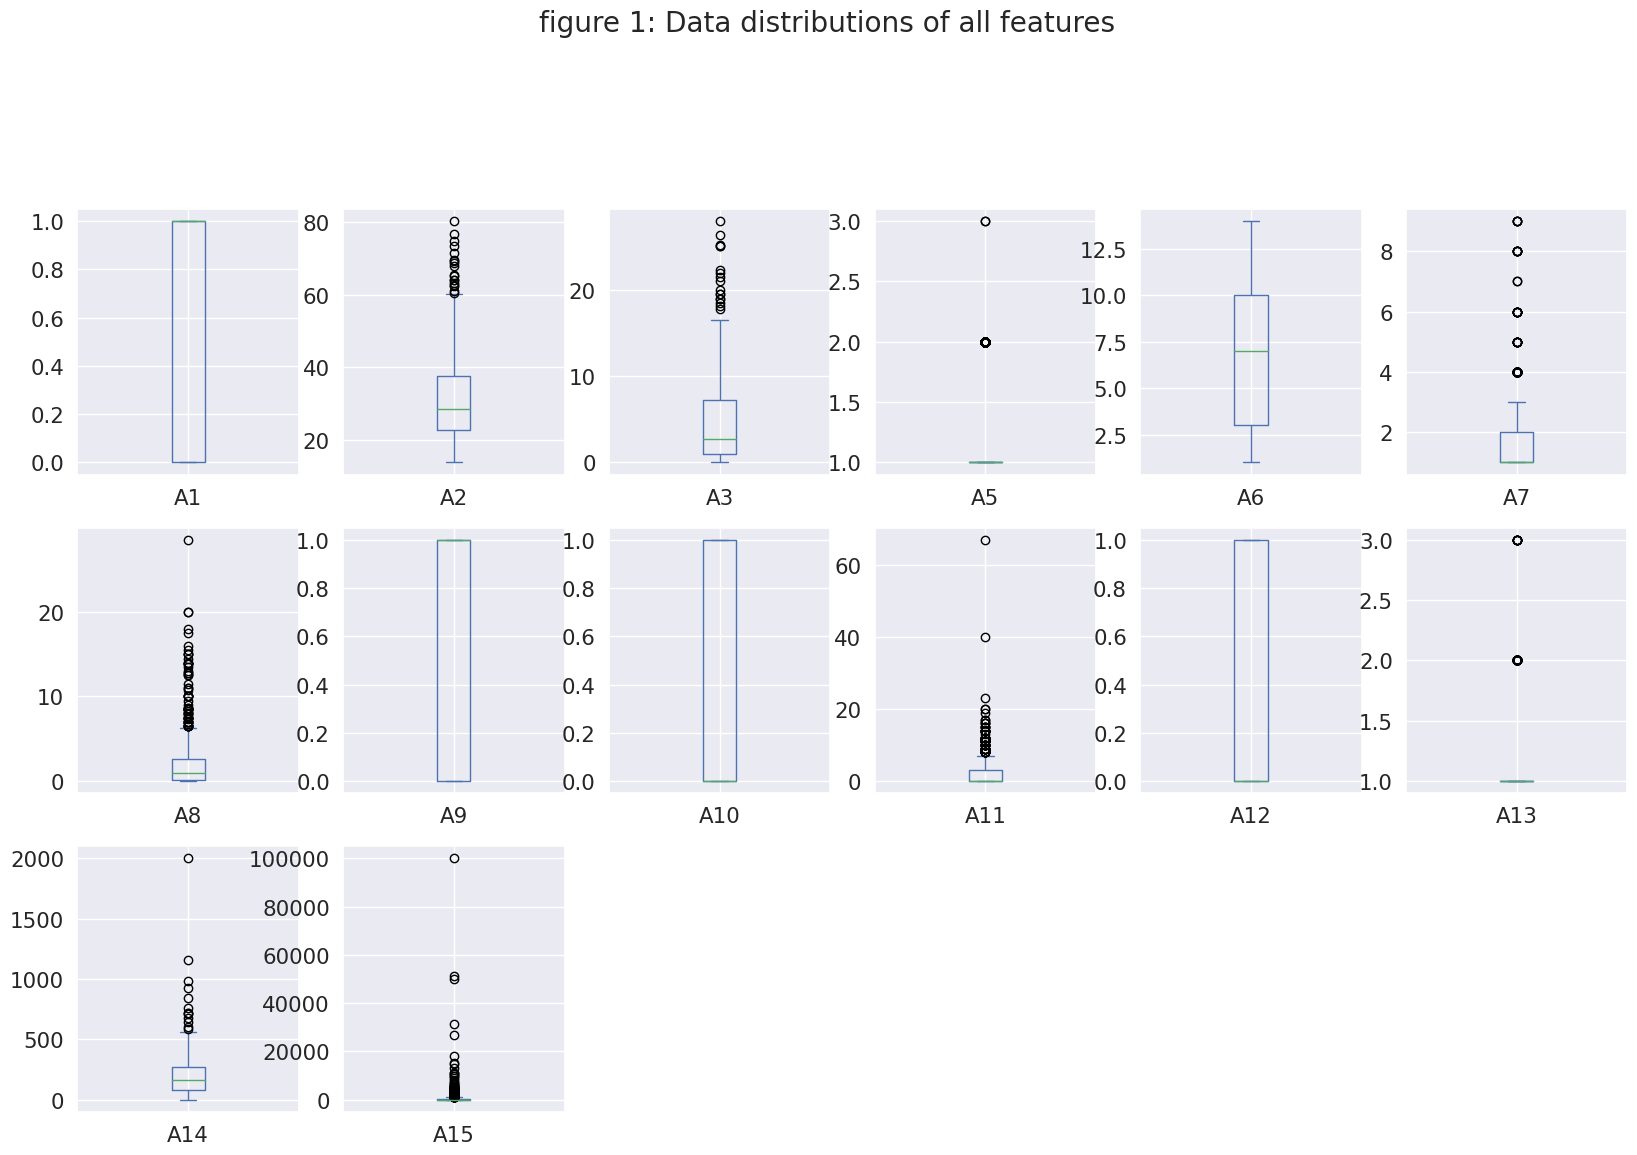

In [56]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

## BAB 7 – (J.62DMI00.010.1) menentukan label data

buat 2 variabel X dan Y = untuk training dan testing
Y isinya data dari class
X semua fitur

In [57]:
y = dataset['Class']

In [58]:
y

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: Class, Length: 690, dtype: object

In [59]:
X = dataset.drop(['Class'], 1) #membuat fitur tanpa kolom class

<ipython-input-59-60258f703909>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop(['Class'], 1) #membuat fitur tanpa kolom class


In [60]:
X

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,30.83,0.000,1,1,1,1.25,1,1,1,0,1,202.0,0
1,0,58.67,4.460,1,2,2,3.04,1,1,6,0,1,43.0,560
2,0,24.50,0.500,1,2,2,1.50,1,0,0,0,1,280.0,824
3,1,27.83,1.540,1,1,1,3.75,1,1,5,1,1,100.0,3
4,1,20.17,5.625,1,1,1,1.71,1,0,0,0,2,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,11,2,1.25,0,0,0,0,1,260.0,0
686,0,22.67,0.750,1,7,1,2.00,0,1,2,1,1,200.0,394
687,0,25.25,13.500,2,13,4,2.00,0,1,1,1,1,200.0,1
688,1,17.92,0.205,1,12,1,0.04,0,0,0,0,1,280.0,750


**Perlakuan Data Original**


Global Test 30%
Cross Validasi utk pencarian parameter optimal dari deccision tree = 2

In [61]:
GLOBAL_TEST = 0.1
GLOBAL_CV = 2

<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=GLOBAL_TEST, random_state=2023)

### Perlakuan data normal

Normalisasi

In [63]:
X_norm = StandardScaler().fit_transform(X)

In [64]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=GLOBAL_TEST, random_state=2023)

**PERLAKUAN DATA Original DAN PCA**

Rumus untuk menentukan reduksi terbaik

In [65]:
pca = PCA(random_state=2023)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of features:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of features:             0           1          2         3         4         5         6   \
0 -1017.344424   20.669257  -1.410117 -3.220808  5.069989 -4.408159 -1.001047   
1  -457.684736 -139.733115  25.992327 -1.879678  5.617405 -3.727718 -3.145165   
2  -193.179205   96.931812  -7.127944 -2.351430  3.253734 -3.740336  0.078240   
3 -1014.562894  -81.342959  -4.231517  1.024001  6.608840 -3.541865  0.783106   
4 -1017.520190  -61.301101 -11.941246  0.892591  0.546634 -6.015175 -0.358435   

         7         8         9         10        11        12        13  
0  0.223607 -0.488257  0.508992 -0.660976  0.111609 -0.149385  0.053783  
1  0.552331 -0.533723  0.659881  0.366121  0.272308 -0.059422  0.047542  
2  1.140788 -0.485787  0.687136  0.374694  0.125913  0.621920 -0.389587  
3  0.164875 -0.426606 -0.465538 -0.340753 -0.115823 -0.120827  0.049108  
4  0.241298  0.218945  0.409476 -0.387219 -0.245561  0.915827  0.488389  
Explained variance ratio: [9.98905538e-01 1.086565

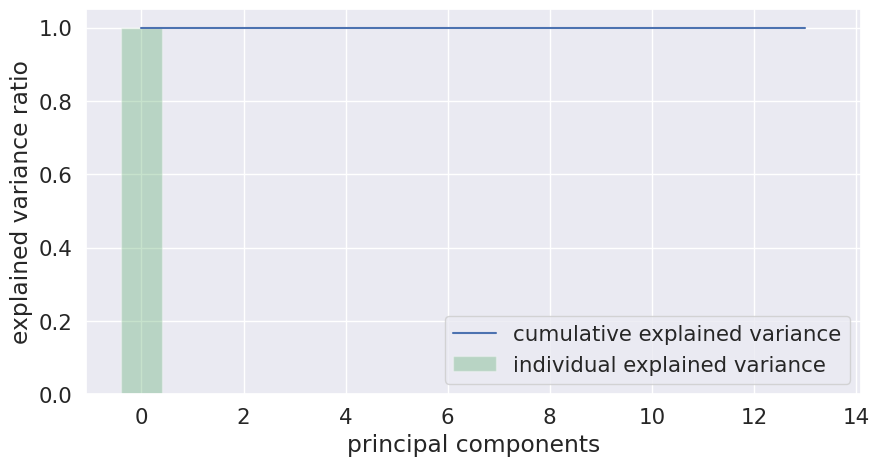

Cumulative explained ratio: [0.99890554 0.9999921  0.9999974  0.99999844 0.99999912 0.99999962
 0.9999999  0.99999996 0.99999997 0.99999998 0.99999999 0.99999999
 1.         1.        ]


In [66]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,alpha=0.3333,align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
        cum_var_ratio,
        where='mid',
        label='cumulative explained variance')
plt.ylabel('explained variance ratio')
plt.xlabel('principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)



Temuan
- Dua komponen sudah oke dengan 2 komponen komulatif explain ratio sudah 0,999

In [67]:
pca = PCA(n_components=2, random_state=2023)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC1', 'PC2'])

In [68]:
ori_pca

,PC1,PC2
0,-1017.344424,20.669257
1,-457.684736,-139.733115
2,-193.179205,96.931812
3,-1014.562894,-81.342959
4,-1017.520190,-61.301101
...,...,...
685,-1017.219083,78.642369
686,-623.349704,17.852550
687,-1016.347048,18.587620
688,-267.179262,97.118418


## BAB 8 – (J.62DMI00.013.1) membangun model

### menggunakan Decision Tree

In [69]:
parameters_dt = {
                 "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,101,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [70]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

#### Pemodelan data original

In [71]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

In [ ]:
ori_classifier_dt.best_estimator_

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

#### Pemodelan data normal

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

In [ ]:
norm_classifier_dt.best_estimator_

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan

### evaluasi data original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

In [ ]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi data normal

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

In [ ]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),

         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

In [ ]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),

                    ]

In [ ]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data original)

In [ ]:
from sklearn import tree

In [ ]:
# feature_importances = ori_classifier_dt.best_estimator_.named_steps["model"].feature_importances_
# feature_importances

In [ ]:
def Analize_Feature(model,X_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(X_test.columns))
    for name, importance in zip(X_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    print(df_features_importance.sort_values(by='coef',ascending=False))
    return df_features_importance
Analize_Feature(ori_classifier_dt,X_test)

In [ ]:
dataset.head()

In [ ]:
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"])

In [ ]:
fn=["A1","A2","A3","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15"]
cn=['+', '-']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300) #
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

cara baca:
Jika Bilirubin <=2.45 maka ke node kiri, selain itu ke kanan.